<a href="https://colab.research.google.com/github/sowmyakavali/Computer-Vision/blob/main/Balanced_dataset_preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries

In [ ]:
import os
import cv2
import glob
import shutil
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

#### Get the count of labels and plot histogram

In [ ]:
def get_count_labels(labels_path):
    annotations = glob.glob(os.path.join(labels_path, "*.txt"))
    labels = {}
    for filename in tqdm(annotations):
        if not filename.endswith("classes.txt"):
            with open(filename, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    line = line.split(" ")
                    cls = int(line[0])
                    if not cls in list(labels.keys()):
                        labels[cls] = 1
                    else:
                        labels[cls] += 1
                        
    return dict(sorted(labels.items()))

100%|██████████| 1026/1026 [00:11<00:00, 87.46it/s]

{0: 331, 1: 34, 2: 159, 3: 45, 4: 641, 5: 1}


Text(0.5, 0.98, 'Classes and Instances count')

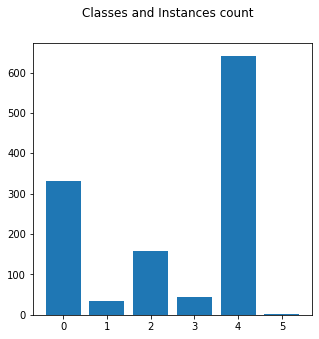

In [ ]:
# .txt files path
labels_path = "Dataset"
labels_count = get_count_labels(labels_path)
print(labels_count)

names, values = list(labels_count.keys()), list(labels_count.values())
fig, axs = plt.subplots(figsize=(5, 5))
axs.bar(names, values)
fig.suptitle('Classes and Instances count')

#### You can extract specific count of instances for each class To get the balanced dataset

In [ ]:
# You can give count of each class you needed
required_counts = {0:100, 1:100, 2:100, 3:100, 4:100}

# list of all annotations
annos = glob.glob(labels_path + "/*.txt")

new_annos = []
new_annosCount = {}
for labelfile in annos:
    filename = labelfile.split("/")[-1]
    with open(labelfile, 'r') as f:
        lines = f.readlines()
        for line in lines:
            values = line.split(" ")
            cls = int(values[0])
            box = list(map(float, values[1:]))
            if not cls in list(new_annosCount.keys()):
                new_annosCount[cls] = 1
                new_annos.append([filename, cls] + box)
            else:
                if new_annosCount[cls] <= required_counts[cls]:
                    new_annos.append([filename, cls] + box)
                new_annosCount[cls] += 1

print(len(new_annos))
# create dataframe to extracted labels
df = pd.DataFrame(new_annos, columns=['filename', 'classind', 'xcenter', 'ycenter', 'width', 'height'])
len(df)

383


383

#### save those extracted labels in new directory

100%|██████████| 338/338 [00:00<00:00, 13637.26it/s]

{0: 101, 1: 34, 2: 101, 3: 45, 4: 101, 5: 1}


Text(0.5, 0.98, 'Classes and Instances count')

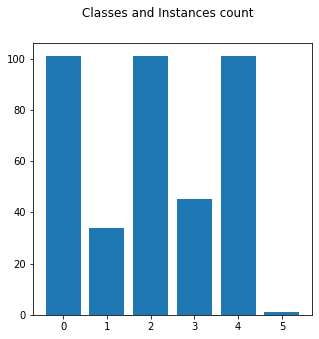

In [ ]:
savedir = "/home/user/Desktop/Detection-Balanced"
if not os.path.isdir(savedir):
    os.makedirs(savedir)

for filename, group in df.groupby(['filename']):
    imagename = filename.split("/")[-1].replace(".txt", ".jpg")
    if os.path.isfile(imagename):
        with open(os.path.join(savedir, filename), 'w') as f:
            for i, line in group.iterrows():
                l = str(line['classind']) + " " + str(line['xcenter']) + " " + str(line['ycenter']) + " " + str(line['width']) + " " + str(line['height']) + "\n"
                f.write(l)

        
        shutil.copyfile(os.path.join(labels_path, imagename), os.path.join(savedir, imagename))
        

# -------plot histogram of balanced dataset ----------------
labels_count = get_count_labels(savedir)
print(labels_count)

names, values = list(labels_count.keys()), list(labels_count.values())
fig, axs = plt.subplots(figsize=(5, 5))
axs.bar(names, values)
fig.suptitle('Classes and Instances count')

#### Split Dataset into Train and Val

In [ ]:
train_images = "/home/user/Desktop/Data/train/images"
train_labels = "/home/user/Desktop/Data/train/labels"
val_images = "/home/user/Desktop/Data/val/images"
val_labels = "/home/user/Desktop/Data/val/labels"
test_images = "/home/user/Desktop/Data/test/images"
test_labels = "/home/user/Desktop/Data/test/labels"

if not os.path.isdir(train_images):
    os.makedirs(train_images)

if not os.path.isdir(train_labels):
    os.makedirs(train_labels)

if not os.path.isdir(val_images):
    os.makedirs(val_images)

if not os.path.isdir(val_labels):
    os.makedirs(val_labels)     

if not os.path.isdir(test_images):
    os.makedirs(test_images)

if not os.path.isdir(test_labels):
    os.makedirs(test_labels)     

train_per = 0.7
val_per = 0.2
test_per = 0.1 

In [ ]:
images = glob.glob(savedir + "/*.jpg")
trainfilescount = int(train_per * len(images))
valfilescount= trainfilescount + int(val_per * len(images))
testfilescount = valfilescount + int(test_per * len(images))

# training images
for imfile in images[:trainfilescount]:
    txtfile = imfile.replace(".jpg", ".txt")
    if os.path.isfile(txtfile):
        shutil.copyfile(imfile, os.path.join(train_images, imfile.split("/")[-1]))
        shutil.copyfile(txtfile, os.path.join(train_labels, txtfile.split("/")[-1]))

# validation images
for imfile in images[trainfilescount:valfilescount]:
    txtfile = imfile.replace(".jpg", ".txt")
    if os.path.isfile(txtfile):
        shutil.copyfile(imfile, os.path.join(val_images, imfile.split("/")[-1]))
        shutil.copyfile(txtfile, os.path.join(val_labels, txtfile.split("/")[-1]))

# test images
for imfile in images[valfilescount:]:
    txtfile = imfile.replace(".jpg", ".txt")
    if os.path.isfile(txtfile):
        shutil.copyfile(imfile, os.path.join(test_images, imfile.split("/")[-1]))
        shutil.copyfile(txtfile, os.path.join(test_labels, txtfile.split("/")[-1]))

##### Train set labels histogram

100%|██████████| 235/235 [00:00<00:00, 16252.17it/s]

{0: 68, 1: 28, 2: 76, 3: 33, 4: 61}


Text(0.5, 0.98, 'Training Classes and Instances count')

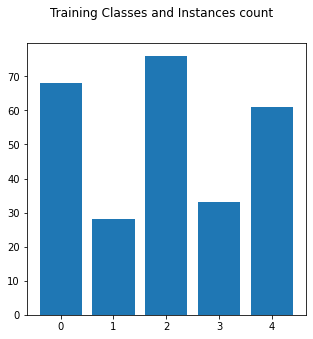

In [ ]:
labels_count = get_count_labels(train_labels)
print(labels_count)

names, values = list(labels_count.keys()), list(labels_count.values())
fig, axs = plt.subplots(figsize=(5, 5))
axs.bar(names, values)
fig.suptitle('Training Classes and Instances count')

##### Validation set labels histogram

100%|██████████| 67/67 [00:00<00:00, 10636.98it/s]

{0: 27, 1: 5, 2: 15, 3: 8, 4: 22}


Text(0.5, 0.98, 'Validation Classes and Instances count')

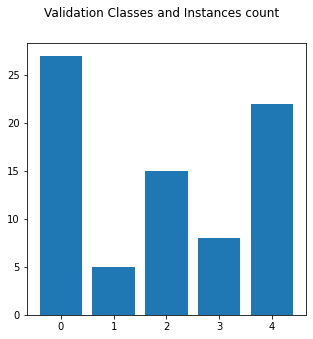

In [ ]:
labels_count = get_count_labels(val_labels)
print(labels_count)

names, values = list(labels_count.keys()), list(labels_count.values())
fig, axs = plt.subplots(figsize=(5, 5))
axs.bar(names, values)
fig.suptitle('Validation Classes and Instances count')

#### Draw the bounding boxes and verify them whether they are correctly labelled or not

In [ ]:
def verify_your_convertedlabels(images_path, verification_path, count, labels_path, labels_names):
    
    if not os.path.isdir(verification_path):
        os.makedirs(verification_path)
        
    generated_txts = glob.glob(labels_path + "/" + "*.txt")#[:count]

    # define color values here
    colors_dict = {0:(0,0,255), 1:(0,255,0), 2:(255,0,0), 3:(255,255,0), 4:(255,0,255)}
    for i in generated_txts:
        txt = i.split("/")[-1]
        img = txt.replace(".txt", ".jpg")
        image = os.path.join(images_path, img)
        im = cv2.imread(image)
        h, w = im.shape[:2]

        # plt.figure(figsize = (100, 100)) 
        with open(i, 'r') as f:
            lines = f.readlines()
            for line in lines:
                  line = line.strip().split(" ")
                  cls = int(line[0])
                  classname = labels_names[cls]
                  x1,y1,w1,h1 = map(float, line[1:])
                  xmin = int((x1*w) - (w1*w)/2.0)
                  ymin = int((y1*h) - (h1*h)/2.0)
                  xmax = int((x1*w) + (w1*w)/2.0)
                  ymax = int((y1*h) + (h1*h)/2.0)
                  color = colors_dict[cls]
                  im = cv2.rectangle(im, (xmin, ymin), (xmax, ymax), color, 4)
                  im = cv2.putText(im, classname, (xmin-10, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 6, cv2.LINE_AA)
        cv2.imwrite(os.path.join(verification_path, img), im)


# some example count to check
count = -1
# images and labels paths
images_path = "/home/user/Desktop/Data/train/images"
labels_path = "/home/user/Desktop/Data/train/labels"
# path to save verification images
verification_path = "/home/user/Desktop/verification/train"
# classes list
labels_names = {0:'car', 1:'bus', 2:'bike', 3:'bicycle', 4:'zeep'}
# Start verifying
verify_your_convertedlabels(images_path, verification_path, count, labels_path, labels_names)